In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

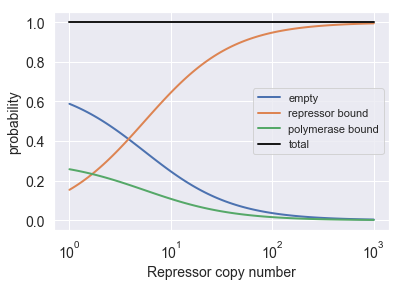

In [28]:
# parameters
dE_R = -14 # binding energy of repressor, units of kBT
dE_P = -6 # binding energy of polymerase, units of kBT
P = 5000 # number of polymerase per cell
N_NS = 4.6E6 # number of non-specific binding sites (lenght of genome)

# range of repressor copy numbers to look at 
R = np.logspace(0, 3, 100)

# weights
empty_weight = np.ones(len(ligand_conc))
R_bound_weight = (R / N_NS) * np.exp(-dE_R)
P_bound_weight = (P / N_NS) * np.exp(-dE_P)
Z = empty_weight + R_bound_weight + P_bound_weight

# convert weights to probabilities 
empty_prob = empty_weight / Z
R_bound_prob = R_bound_weight / Z
P_bound_prob = P_bound_weight / Z
tot_prob = empty_prob + R_bound_prob + P_bound_prob

# plot
plt.plot(R_num, empty_prob)
plt.plot(R_num, R_bound_prob)
plt.plot(R_num, P_bound_prob)
plt.plot(R_num, tot_prob, "k")

# label
plt.xscale("log")
plt.xlabel("Repressor copy number")
plt.ylabel("probability")
plt.legend(["empty", "repressor bound", "polymerase bound", "total"])

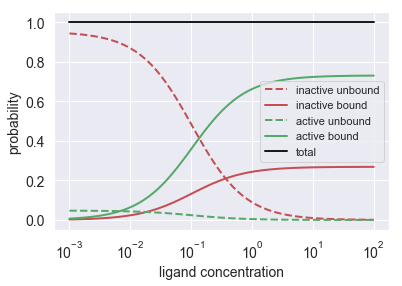

In [21]:
# energies, in kT
dEI = -1 # energy of ligand bound to inactive state
dEA = -5 # energy of ligand bound to active state
dES = 3 # energy of active state (regardless of ligand) 

# ligand range to look at
ligand_conc = np.logspace(-3, 2, 100) 

# weights using shorthand: 
# I for inactive, A for active, U for unbound, B for bound
IU_weight = np.ones(len(ligand_conc))
IB_weight = ligand_conc * np.exp(-dEI)
AU_weight = np.exp(-dES) * np.ones(len(ligand_conc))
AB_weight = ligand_conc * np.exp(-dES) * np.exp(-dEA)
Z = IU_weight + IB_weight + AU_weight + AB_weight 

# convert weights to probabilities 
IU_prob = IU_weight / Z
IB_prob = IB_weight / Z
AU_prob = AU_weight / Z
AB_prob = AB_weight / Z
tot_prob = IU_prob + IB_prob + AU_prob + AB_prob

# plot
plt.plot(ligand_conc, IU_prob, "r--")
plt.plot(ligand_conc, IB_prob, "r-")
plt.plot(ligand_conc, AU_prob, "g--")
plt.plot(ligand_conc, AB_prob, "g-")
plt.plot(ligand_conc, tot_prob, "k")

# label
plt.xscale("log")
plt.xlabel("ligand concentration")
plt.ylabel("probability")
plt.legend(["inactive unbound", "inactive bound", "active unbound", "active bound", "total"])